Importér Nødvendige Biblioteker

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # Eksempel classifier
from sklearn.metrics import accuracy_score
import sqlite3

Indlæs Data: Brug pandas til at indlæse datasættet i en DataFrame.

In [12]:
# Erstat 'sti/til/din/data.csv' med den faktiske sti
df = pd.read_csv('horse.csv')

Indledende Dataudforskning: Få et overblik over dataene:

In [13]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


Få information om kolonner, datatyper og ikke-null værdier:

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

Få deskriptiv statistik:

In [15]:
df.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


Tæl manglende værdier pr. kolonne

In [16]:
df.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

Visualisér Manglende Data:

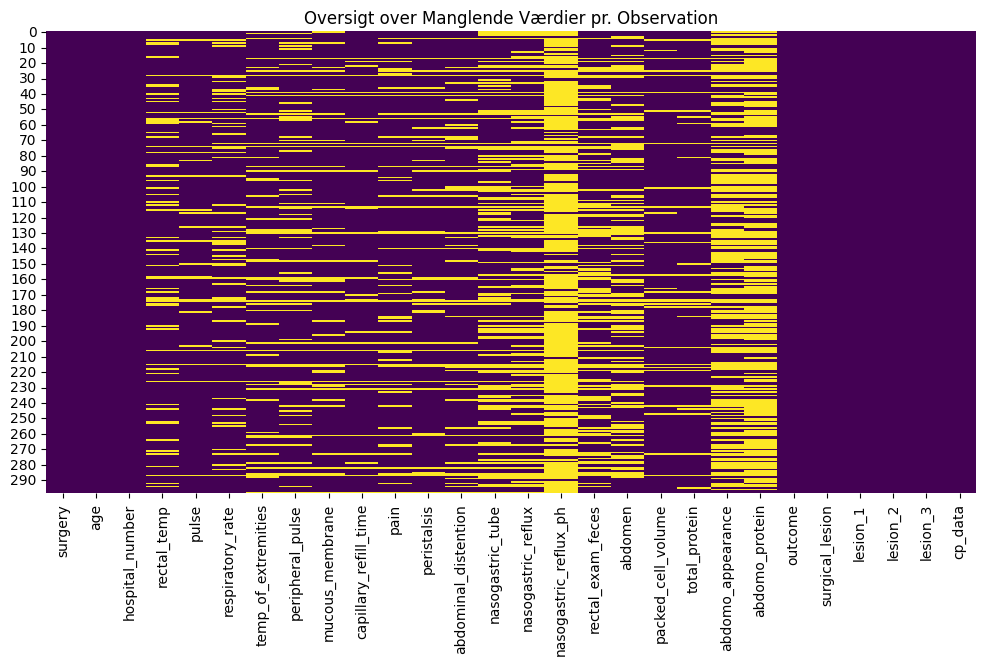


Procentdel manglende værdier pr. kolonne:
nasogastric_reflux_ph    82.274247
abdomo_protein           66.220736
abdomo_appearance        55.183946
abdomen                  39.464883
nasogastric_reflux       35.451505
nasogastric_tube         34.782609
rectal_exam_feces        34.113712
peripheral_pulse         23.076923
rectal_temp              20.066890
respiratory_rate         19.397993
temp_of_extremities      18.729097
abdominal_distention     18.729097
pain                     18.394649
mucous_membrane          15.719064
peristalsis              14.715719
total_protein            11.036789
capillary_refill_time    10.702341
packed_cell_volume        9.698997
pulse                     8.026756
lesion_2                  0.000000
surgical_lesion           0.000000
lesion_3                  0.000000
lesion_1                  0.000000
surgery                   0.000000
outcome                   0.000000
age                       0.000000
hospital_number           0.000000
cp_data     

In [17]:
# Visualiser manglende værdier
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Oversigt over Manglende Værdier pr. Observation')
plt.show()

# Beregn procentdelen af manglende værdier pr. kolonne
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nProcentdel manglende værdier pr. kolonne:")
print(missing_percentage.sort_values(ascending=False))

Adskil Numeriske og Kategoriske Kolonner med Manglende Værdier

In [18]:
# Identificer kolonner med manglende værdier
cols_with_missing = df.columns[df.isnull().any()].tolist()

# Adskil baseret på dtype (juster evt. hvis nogle 'object' reelt er numeriske eller omvendt)
numeric_cols_missing = df[cols_with_missing].select_dtypes(include=np.number).columns.tolist()
categorical_cols_missing = df[cols_with_missing].select_dtypes(include='object').columns.tolist()

# Print resultatet for at verificere
print("Numeriske kolonner med manglende værdier:")
print(numeric_cols_missing)
print("\nKategoriske kolonner med manglende værdier:")
print(categorical_cols_missing)

# Særskilt håndtering af de meget problematiske kolonner
high_missing_cols = ['nasogastric_reflux_ph', 'abdomo_protein', 'abdomo_appearance']
print("\nKolonner med meget høj mangelprocent (>50%):")
print(high_missing_cols)

Numeriske kolonner med manglende værdier:
['rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein', 'abdomo_protein']

Kategoriske kolonner med manglende værdier:
['temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'abdomo_appearance']

Kolonner med meget høj mangelprocent (>50%):
['nasogastric_reflux_ph', 'abdomo_protein', 'abdomo_appearance']


Definer Imputationsstrategi

In [19]:
# Strategi:
# - Numerisk -> Median
# - Kategorisk -> Modus (most_frequent)

# Vi har allerede identificeret kolonnerne i:
# numeric_cols_missing
# categorical_cols_missing

Opret Imputer Objekter

In [20]:
from sklearn.impute import SimpleImputer

# Opret imputer for numeriske kolonner (strategi='median')
median_imputer = SimpleImputer(strategy='median')

# Opret imputer for kategoriske kolonner (strategi='most_frequent')
mode_imputer = SimpleImputer(strategy='most_frequent')

Opret Kopi af DataFrame

In [21]:
# Opret en kopi
df_imputed = df.copy()

print("Kopi 'df_imputed' oprettet.")

Kopi 'df_imputed' oprettet.


Imputer Numeriske Kolonner

In [22]:
# Tjek om der er numeriske kolonner at imputere
if numeric_cols_missing:
    print(f"Imputerer {len(numeric_cols_missing)} numeriske kolonner med median:")
    print(numeric_cols_missing)

    # Anvend imputer: Lærer medianen og transformerer data
    df_imputed[numeric_cols_missing] = median_imputer.fit_transform(df_imputed[numeric_cols_missing])

    print("\nNumerisk imputering færdig.")
else:
    print("Ingen numeriske kolonner med manglende værdier fundet.")

Imputerer 7 numeriske kolonner med median:
['rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein', 'abdomo_protein']

Numerisk imputering færdig.


Imputer Kategoriske Kolonner

In [23]:
# Tjek om der er kategoriske kolonner at imputere
if categorical_cols_missing:
    print(f"Imputerer {len(categorical_cols_missing)} kategoriske kolonner med modus:")
    print(categorical_cols_missing)

    # Anvend imputer: Lærer modus og transformerer data
    imputed_categorical_data = mode_imputer.fit_transform(df_imputed[categorical_cols_missing])

    # Konverter tilbage til DataFrame for at bevare struktur
    df_imputed_categorical = pd.DataFrame(imputed_categorical_data, 
                                          columns=categorical_cols_missing, 
                                          index=df_imputed.index)

    # Opdater det kopierede dataframe med de imputerede kategoriske data
    df_imputed[categorical_cols_missing] = df_imputed_categorical

    print("\nKategorisk imputering færdig.")
else:
    print("Ingen kategoriske kolonner med manglende værdier fundet.")

Imputerer 12 kategoriske kolonner med modus:
['temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'abdomo_appearance']

Kategorisk imputering færdig.


Verificer Imputering

In [24]:
# Tjek antallet af manglende værdier i det imputerede DataFrame
print("Antal manglende værdier efter simpel imputering:")
missing_after_imputation = df_imputed.isnull().sum()
print(missing_after_imputation[missing_after_imputation > 0]) # Vis kun kolonner der STADIG har manglende værdier (bør være tom)

print("\nTotal antal manglende værdier:", df_imputed.isnull().sum().sum()) 

Antal manglende værdier efter simpel imputering:
Series([], dtype: int64)

Total antal manglende værdier: 0


Inspicer Imputeret Data (Valgfrit men anbefalet)

In [25]:
print("\nInfo om df_imputed efter imputering:")
df_imputed.info()

print("\nHead af df_imputed:")
print(df_imputed.head())


Info om df_imputed efter imputering:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            299 non-null    float64
 4   pulse                  299 non-null    float64
 5   respiratory_rate       299 non-null    float64
 6   temp_of_extremities    299 non-null    object 
 7   peripheral_pulse       299 non-null    object 
 8   mucous_membrane        299 non-null    object 
 9   capillary_refill_time  299 non-null    object 
 10  pain                   299 non-null    object 
 11  peristalsis            299 non-null    object 
 12  abdominal_distention   299 non-null    object 
 13  nasogastric_tube       299 non-null    object 
 14  nasogastric_reflux  